<a href="https://colab.research.google.com/github/christinaxliu/research/blob/main/JPL-Caltech/GalaxiesPaper2024/StarTempVsExoplanetSurfTempGraph/StarTempVsExoplanetSurfTempGraphGen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import division

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import pandas as pd
import seaborn as sns
from google.colab import drive

In [2]:
pd.options.mode.copy_on_write = True

In [36]:
# Constants and methods for plotting graphs

# Mapping from exoplanet type to the corresponding color in the plotting graph
exoplanet_type_colors = {
    'Gas-Giants': 'wheat',
    'Super-Earths': 'salmon',
    'Neptunian-Planets': 'lightsteelblue',
    'Terrestrial-Planets': 'cyan'
}

# Mapping from exoplanet type to the corresponding legend title in the plotting graph
exoplanet_type_labels = {
    'Gas-Giants': 'Gas Giants (size of Saturn or larger)',
    'Super-Earths': 'Super Earths (larger than Earth, smaller than Neptune)',
    'Neptunian-Planets': 'Neptunian Planets (Neptune sized, smaller than Saturn)',
    'Terrestrial-Planets': 'Terrestrial Planets (Earth sized or smaller)'
}

exoplanet_type_colors_with_earth = {
    'Gas-Giants': 'wheat',
    'Super-Earths': 'salmon',
    'Neptunian-Planets': 'lightsteelblue',
    'Terrestrial-Planets': 'cyan',
    'Earth': 'royalblue'
}

exoplanet_type_labels_with_earth = {
    'Gas-Giants': 'Gas Giants (size of Saturn or larger)',
    'Super-Earths': 'Super Earths (larger than Earth, smaller than Neptune)',
    'Neptunian-Planets': 'Neptunian Planets (Neptune sized, smaller than Saturn)',
    'Terrestrial-Planets': 'Terrestrial Planets (Earth sized or smaller)',
    'Earth': 'Earth'
}

exoplanet_type_colors_with_solar_system_planets = {
    'Gas-Giants': 'wheat',
    'Super-Earths': 'salmon',
    'Neptunian-Planets': 'lightsteelblue',
    'Terrestrial-Planets': 'cyan',
    'Mercury': 'gray',
    'Venus': 'goldenrod',
    'Earth': 'royalblue',
    'Mars': 'orangered',
    'Jupiter': 'peru',
    'Saturn': 'gold',
    'Uranus': 'powderblue',
    'Neptune': 'deepskyblue'
}

exoplanet_type_labels_with_solar_system_planets = {
    'Gas-Giants': 'Gas Giants (size of Saturn or larger)',
    'Super-Earths': 'Super Earths (larger than Earth, smaller than Neptune)',
    'Neptunian-Planets': 'Neptunian Planets (Neptune sized, smaller than Saturn)',
    'Terrestrial-Planets': 'Terrestrial Planets (Earth sized or smaller)',
    'Mercury': 'Mercury',
    'Venus': 'Venus',
    'Earth': 'Earth',
    'Mars': 'Mars',
    'Jupiter': 'Jupiter',
    'Saturn': 'Saturn',
    'Uranus': 'Uranus',
    'Neptune': 'Neptune'
}

exoplanet_type_colors_with_solar_system_planets_and_counts = {
    'Gas-Giants': 'wheat',
    'Super-Earths': 'salmon',
    'Neptunian-Planets': 'lightsteelblue',
    'Terrestrial-Planets': 'cyan',
    'Mercury': 'cyan',
    'Venus': 'cyan',
    'Earth': 'cyan',
    'Mars': 'cyan',
    'Jupiter': 'wheat',
    'Saturn': 'wheat',
    'Uranus': 'lightsteelblue',
    'Neptune': 'lightsteelblue'
}

exoplanet_type_labels_with_solar_system_planets_and_counts = {
    'Gas-Giants': 'Gas Giants (size of Saturn or larger, 1163 in total)',
    'Super-Earths': 'Super Earths (larger than Earth and smaller than Neptune, 2856 in total)',
    'Neptunian-Planets': 'Neptunian Planets (Neptune sized and smaller than Saturn, 368 in total)',
    'Terrestrial-Planets': 'Terrestrial Planets (Earth sized or smaller, 180 in total)',
    'Mercury': 'Mercury',
    'Venus': 'Venus',
    'Earth': 'Earth',
    'Mars': 'Mars',
    'Jupiter': 'Jupiter',
    'Saturn': 'Saturn',
    'Uranus': 'Uranus',
    'Neptune': 'Neptune'
}

exoplanet_type_with_hz_colors = {
    'Gas-Giants': 'wheat',
    'Super-Earths': 'salmon',
    'Neptunian-Planets': 'lightsteelblue',
    'Terrestrial-Planets': 'cyan',
    'HabitableZone-Planets': 'lime'
}

exoplanet_type_with_hz_labels = {
    'Gas-Giants': 'Gas Giants (size of Saturn or larger)',
    'Super-Earths': 'Super Earths (larger than Earth, smaller than Neptune)',
    'Neptunian-Planets': 'Neptunian Planets (Neptune sized, smaller than Saturn)',
    'Terrestrial-Planets': 'Terrestrial Planets (Earth sized or smaller)',
    'HabitableZone-Planets': 'Planets in Habitable Zone (including above four planet types)'
}

exoplanet_type_with_hz_colors_with_earth = {
    'Gas-Giants': 'wheat',
    'Super-Earths': 'salmon',
    'Neptunian-Planets': 'lightsteelblue',
    'Terrestrial-Planets': 'cyan',
    'HabitableZone-Planets': 'lime',
    'Earth': 'lime'
}

exoplanet_type_with_hz_labels_with_earth = {
    'Gas-Giants': 'Gas Giants (size of Saturn or larger)',
    'Super-Earths': 'Super Earths (larger than Earth, smaller than Neptune)',
    'Neptunian-Planets': 'Neptunian Planets (Neptune sized, smaller than Saturn)',
    'Terrestrial-Planets': 'Terrestrial Planets (Earth sized or smaller)',
    'HabitableZone-Planets': 'Planets in Habitable Zone (including above four planet types)',
    'Earth': 'Earth'
}

# Create the buckets array
def create_buckets(start, end, interval):
    buckets = []
    value = start
    while value <= end:
        buckets.append(value)
        value += interval
    return buckets

# Plot selected exoplanets with sizeable circles in proportion to the exoplanets' radii
def plot_selected_exoplanets_with_size_and_label(ax, #axes object for plotting graph
                                  exoplanets_data, # DataFrame object that contains exoplanet data
                                  x_field, # Data field for x axis
                                  y_field, # Data field for y axis
                                  size_field, # Data field for the star size
                                  is_selected, # Whether the current data entry is selected or not
                                  color, # Color for the data points in the graph
                                  edgecolors, # Edge color for the data points in the graph
                                  label, # Legend lable for the data points in the graph
                                  scale_size # Scale proportion for circle representing star in graph
                                  ):
    x = exoplanets_data[x_field][is_selected]
    y = exoplanets_data[y_field][is_selected]
    size = exoplanets_data[size_field][is_selected] * scale_size

    ax.scatter(x=x,
               y=y,
               c=color,
               s=size,
               edgecolors=edgecolors,
               label=label)

def plot_selected_exoplanets_with_size(ax, #axes object for plotting graph
                                  exoplanets_data, # DataFrame object that contains exoplanet data
                                  x_field, # Data field for x axis
                                  y_field, # Data field for y axis
                                  size_field, # Data field for the star size
                                  is_selected, # Whether the current data entry is selected or not
                                  color, # Color for the data points in the graph
                                  edgecolors, # Edge color for the data points in the graph
                                  scale_size # Scale proportion for circle representing star in graph
                                  ):
    x = exoplanets_data[x_field][is_selected]
    y = exoplanets_data[y_field][is_selected]
    size = exoplanets_data[size_field][is_selected] * scale_size

    ax.scatter(x=x,
               y=y,
               c=color,
               s=size,
               edgecolors=edgecolors)

# Plot exoplanets with sizeable circles in proportion to the exoplanets' radii
def plot_exoplanets_with_size(ax, exoplanets_data, x_field, y_field, size_field, type_field, hz_status_field, scale_size, edgecolors, exoplanet_color_map, exoplanet_label_map):
    #for exoplanet_type in exoplanet_type_labels:
    for exoplanet_type in exoplanet_label_map:
        if exoplanet_type == 'Gas-Giants' or exoplanet_type == 'Neptunian-Planets' or exoplanet_type == 'Super-Earths' or exoplanet_type == 'Terrestrial-Planets':
            plot_selected_exoplanets_with_size_and_label(ax=ax,
                                      exoplanets_data=exoplanets_data,
                                      x_field=x_field,
                                      y_field=y_field,
                                      size_field=size_field,
                                      is_selected=exoplanets_data[type_field].map(lambda x: x == exoplanet_type),
                                      color=exoplanet_color_map[exoplanet_type],
                                      edgecolors=edgecolors,
                                      label=exoplanet_label_map[exoplanet_type],
                                      scale_size=scale_size)
        else:
            plot_selected_exoplanets_with_size(ax=ax,
                                      exoplanets_data=exoplanets_data,
                                      x_field=x_field,
                                      y_field=y_field,
                                      size_field=size_field,
                                      is_selected=exoplanets_data[type_field].map(lambda x: x == exoplanet_type),
                                      color=exoplanet_color_map[exoplanet_type],
                                      edgecolors=edgecolors,
                                      scale_size=scale_size)

def plot_exoplanets_with_size_and_label(ax, exoplanets_data, x_field, y_field, size_field, type_field, hz_status_field, scale_size, edgecolors, exoplanet_color_map, exoplanet_label_map):
    #for exoplanet_type in exoplanet_type_labels:
    for exoplanet_type in exoplanet_label_map:
            plot_selected_exoplanets_with_size_and_label(ax=ax,
                                      exoplanets_data=exoplanets_data,
                                      x_field=x_field,
                                      y_field=y_field,
                                      size_field=size_field,
                                      is_selected=exoplanets_data[type_field].map(lambda x: x == exoplanet_type),
                                      color=exoplanet_color_map[exoplanet_type],
                                      edgecolors=edgecolors,
                                      label=exoplanet_label_map[exoplanet_type],
                                      scale_size=scale_size)

# Set legend with fixed size
def set_legend_size(legend, legend_count, legend_size):
    for i in range (legend_count):
        legend.legend_handles[i]._sizes = [legend_size]

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
exoplanets_filename = '/content/drive/My Drive/Colab Notebooks/research/JPL-Caltech/GalaxiesPaper2024/StarTempVsExoplanetSurfTempGraph/NASA-EA-03-10-2024-HZs-07-13-2024.csv'
exoplanets_data = pd.read_table(exoplanets_filename,
                                skiprows=89,
                                sep=',',
                                header=None,
                                index_col=None,
                                names = ['pl_name', 'hostname', 'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year', 'disc_facility', 'pl_controv_flag',
                                          'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim',
                                          'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim',
                                          'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim',
                                          'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim',
                                          'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim',
                                          'ttv_flag', 'st_spectype', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim',
                                          'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 'st_metlim',
                                          'st_metratio', 'st_logg', 'st_loggerr1', 'st_loggerr2', 'st_logglim', 'rastr', 'ra', 'decstr', 'dec',
                                          'sy_dist', 'sy_disterr1', 'sy_disterr2', 'sy_vmag', 'sy_vmagerr1', 'sy_vmagerr2', 'sy_kmag', 'sy_kmagerr1', 'sy_kmagerr2',
                                          'sy_gaiamag', 'sy_gaiamagerr1', 'sy_gaiamagerr2',
                                          'placeholder1', 'placeholder2', 'raw_data_calc_orb_sma', 'placeholder3', 'raw_data_tsurf_k', 'raw_data_tsurf_c'],
                                skipfooter=0,
                                engine='python')

In [5]:
# Sanity check the first several rows of data to ensure data is read correctly
exoplanets_data.head()

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,placeholder1,placeholder2,raw_data_calc_orb_sma,placeholder3,raw_data_tsurf_k,raw_data_tsurf_c
0,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,323.21000,0.06000,...,-0.346,4.44038,0.003848,-0.003848,NaN,NaN,1.178453,NaN,828.6423703,555.4923703
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.21997,3.20000,...,-0.270,4.56216,0.003903,-0.003903,NaN,NaN,1.770837,NaN,924.7536086,651.6036086
2,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,186.76000,0.11000,...,-0.240,4.91781,0.002826,-0.002826,NaN,NaN,0.774943,NaN,938.677434,665.527434
3,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,1765.03890,1.67709,...,-0.016,6.38300,0.000351,-0.000351,NaN,NaN,2.769856,NaN,153.7488424,-119.4011576
4,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,0,798.50000,1.00000,...,-0.016,6.06428,0.000603,-0.000603,NaN,NaN,1.728217,NaN,235.9924243,-37.15757566


In [6]:
# Sanity check the last several rows of data to ensure data is read correctly.
exoplanets_data.tail()

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,placeholder1,placeholder2,raw_data_calc_orb_sma,placeholder3,raw_data_tsurf_k,raw_data_tsurf_c
5590,ups And b,ups And,2,3,Radial Velocity,1996,Lick Observatory,0,4.617033,0.000023,...,-0.274,3.98687,0.008937,-0.008937,NaN,NaN,0.059224,NaN,1571.87763,1298.72763
5591,ups And c,ups And,2,3,Radial Velocity,1999,Multiple Observatories,0,241.258000,0.064000,...,-0.274,3.98687,0.008937,-0.008937,NaN,NaN,0.827770,NaN,420.4403392,147.2903392
5592,ups And d,ups And,2,3,Radial Velocity,1999,Multiple Observatories,0,1276.460000,0.570000,...,-0.274,3.98687,0.008937,-0.008937,NaN,NaN,2.513389,NaN,241.2898018,-31.86019816
5593,ups Leo b,ups Leo,1,1,Radial Velocity,2021,Okayama Astrophysical Observatory,0,385.200000,2.800000,...,-0.248,4.03040,0.008513,-0.008513,NaN,NaN,1.180734,NaN,741.7998759,468.6498759
5594,xi Aql b,xi Aql,1,1,Radial Velocity,2007,Okayama Astrophysical Observatory,0,136.970000,0.110000,...,-0.220,4.42501,0.003837,-0.003837,NaN,NaN,0.625471,NaN,1003.818109,730.6681086


In [7]:
# Get the statistics about the data
exoplanets_data.describe()

,sy_snum,sy_pnum,disc_year,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,...,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,placeholder1,placeholder2,raw_data_calc_orb_sma,placeholder3
count,5595.000000,5595.000000,5595.000000,5595.000000,5.346000e+03,4.867000e+03,4.867000e+03,5346.000000,5298.000000,2693.000000,...,5380.000000,5344.000000,5332.000000,5325.000000,5323.000000,5323.000000,0.0,0.0,5595.000000,0.0
mean,1.102949,1.780340,2016.183378,0.005362,8.000063e+04,9.833082e+04,-2.245538e+04,-0.000748,6.645989,2.396079,...,10.507131,0.043215,-0.043239,12.354292,0.000647,-0.000647,NaN,NaN,2.136464,NaN
std,0.343149,1.160135,4.524510,0.073035,5.500653e+06,6.737339e+06,1.435544e+06,0.038680,134.281668,100.438674,...,3.043480,0.264590,0.270785,3.002147,0.001849,0.001849,NaN,NaN,102.667525,NaN
min,1.000000,1.000000,1992.000000,0.000000,9.070629e-02,0.000000e+00,-1.000000e+08,-1.000000,0.004400,0.000000,...,-3.044000,0.011000,-9.995000,2.364310,0.000118,-0.063232,NaN,NaN,0.000000,NaN
25%,1.000000,1.000000,2014.000000,0.000000,4.466662e+00,1.500000e-05,-1.695000e-03,0.000000,0.053225,0.000830,...,8.559500,0.020000,-0.031000,10.545900,0.000257,-0.000537,NaN,NaN,0.048345,NaN
50%,1.000000,1.000000,2016.000000,0.000000,1.157844e+01,1.000000e-04,-1.000000e-04,0.000000,0.103580,0.002900,...,11.431000,0.023000,-0.023000,13.234000,0.000364,-0.000364,NaN,NaN,0.090431,NaN
75%,1.000000,2.000000,2020.000000,0.000000,4.164312e+01,1.690000e-03,-1.500000e-05,0.000000,0.301000,0.039000,...,12.848250,0.031000,-0.020000,14.770000,0.000537,-0.000257,NaN,NaN,0.216737,NaN
max,4.000000,8.000000,2024.000000,1.000000,4.020000e+08,4.700000e+08,0.000000e+00,1.000000,7506.000000,5205.000000,...,33.110000,9.995000,-0.011000,20.186100,0.063232,-0.000118,NaN,NaN,7652.883408,NaN


In [8]:
# Cast values to corresponding data types
exoplanets_data['pl_name'] = exoplanets_data['pl_name'].astype(str)
exoplanets_data['hostname'] = exoplanets_data['hostname'].astype(str)
pd.to_numeric(exoplanets_data['sy_snum'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_pnum'], errors = "coerce")
exoplanets_data['discoverymethod'] = exoplanets_data['discoverymethod'].astype(str)
pd.to_numeric(exoplanets_data['disc_year'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_controv_flag'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbper'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbpererr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbpererr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbperlim'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbsmax'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbsmaxerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbsmaxerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbsmaxlim'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_rade'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_radeerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_radeerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_radelim'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_radj'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_radjerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_radjerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_radjlim'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmasse'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmasseerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmasseerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmasselim'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmassj'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmassjerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmassjerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmassjlim'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmassprov'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbeccen'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbeccenerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbeccenerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbeccenlim'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_insol'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_insolerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_insolerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_insollim'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_eqt'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_eqterr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_eqterr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_eqtlim'], errors = "coerce")
pd.to_numeric(exoplanets_data['ttv_flag'], errors = "coerce")
exoplanets_data['st_spectype'] = exoplanets_data['st_spectype'].astype(str)
pd.to_numeric(exoplanets_data['st_teff'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_tefferr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_tefferr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_tefflim'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_rad'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_raderr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_raderr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_radlim'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_mass'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_masserr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_masserr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_masslim'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_met'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_meterr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_meterr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_metlim'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_metratio'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_logg'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_loggerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_loggerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_logglim'], errors = "coerce")
exoplanets_data['rastr'] = exoplanets_data['rastr'].astype(str)
pd.to_numeric(exoplanets_data['ra'], errors = "coerce")
exoplanets_data['decstr'] = exoplanets_data['decstr'].astype(str)
pd.to_numeric(exoplanets_data['dec'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_dist'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_disterr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_disterr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_vmag'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_vmagerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_vmagerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_kmag'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_kmagerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_kmagerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_gaiamag'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_gaiamagerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_gaiamagerr2'], errors = "coerce")
exoplanets_data['placeholder1'] = exoplanets_data['placeholder1'].astype(str)
exoplanets_data['placeholder2'] = exoplanets_data['placeholder2'].astype(str)
pd.to_numeric(exoplanets_data['raw_data_calc_orb_sma'], errors = "coerce")
exoplanets_data['placeholder3'] = exoplanets_data['placeholder3'].astype(str)
pd.to_numeric(exoplanets_data['raw_data_tsurf_k'], errors = "coerce")
pd.to_numeric(exoplanets_data['raw_data_tsurf_c'], errors = "coerce")

,raw_data_tsurf_c
0,555.492370
1,651.603609
2,665.527434
3,-119.401158
4,-37.157576
...,...
5590,1298.727630
5591,147.290339
5592,-31.860198
5593,468.649876


In [9]:
# Change any fields with empty spaces to NaN values so we can clean them up later on
exoplanets_data = exoplanets_data.applymap(lambda x: np.nan if isinstance(x, str) and x.isspace() else x)

<ipython-input-9-2d85f477f97e>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  exoplanets_data = exoplanets_data.applymap(lambda x: np.nan if isinstance(x, str) and x.isspace() else x)


In [10]:
exoplanets_data['pl_controv_flag'].value_counts()

,count
pl_controv_flag,
0,5565
1,30


In [11]:
# Only selects exoplanets with pl_controv_flag == 0
exoplanets_data = exoplanets_data.loc[(exoplanets_data['pl_controv_flag'] == 0)]

In [12]:
exoplanets_data.describe()

,sy_snum,sy_pnum,disc_year,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,...,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,raw_data_calc_orb_sma
count,5565.000000,5565.000000,5565.000000,5565.0,5.319000e+03,4.843000e+03,4.843000e+03,5319.000000,5272.000000,2671.000000,...,5346.000000,5338.000000,5332.000000,5350.000000,5320.000000,5308.000000,5295.000000,5293.000000,5293.000000,5565.000000
mean,1.101348,1.775202,2016.192812,0.0,8.039081e+04,9.881373e+04,-2.256510e+04,-0.000752,6.652600,2.411458,...,12.644569,0.102186,-0.103844,10.515094,0.043202,-0.043226,12.362402,0.000629,-0.000629,2.138414
std,0.339905,1.156031,4.523445,0.0,5.514596e+06,6.754012e+06,1.439096e+06,0.038778,134.609554,100.851439,...,3.097079,0.140159,0.209902,3.032250,0.265134,0.271346,2.994987,0.001686,0.001686,102.942789
min,1.000000,1.000000,1992.000000,0.0,9.070629e-02,0.000000e+00,-1.000000e+08,-1.000000,0.004400,0.000000,...,0.872000,0.001000,-11.920000,-3.044000,0.011000,-9.995000,2.364310,0.000118,-0.063232,0.000000
25%,1.000000,1.000000,2014.000000,0.0,4.467694e+00,1.500000e-05,-1.600000e-03,0.000000,0.053175,0.000810,...,10.862000,0.030000,-0.126000,8.598000,0.020000,-0.031000,10.575700,0.000257,-0.000536,0.048373
50%,1.000000,1.000000,2016.000000,0.0,1.155562e+01,1.000000e-04,-1.000000e-04,0.000000,0.103250,0.002800,...,13.474500,0.080000,-0.080000,11.438000,0.023000,-0.023000,13.240800,0.000364,-0.000364,0.090369
75%,1.000000,2.000000,2020.000000,0.0,4.139416e+01,1.600000e-03,-1.500000e-05,0.000000,0.300000,0.037500,...,15.008250,0.126000,-0.030000,12.847750,0.031000,-0.020000,14.770000,0.000536,-0.000257,0.215856
max,4.000000,8.000000,2024.000000,0.0,4.020000e+08,4.700000e+08,0.000000e+00,1.000000,7506.000000,5205.000000,...,44.610000,3.100000,-0.001000,33.110000,9.995000,-0.011000,20.186100,0.063232,-0.000118,7652.883408


In [13]:
exoplanets_data['pl_tsurf_k'] = 1.13 * exoplanets_data['st_teff'] * ((1 - 0.306) ** 0.25) * (((exoplanets_data['st_rad'] * 696000) / (2 * exoplanets_data['pl_orbsmax'] * 149598023)) ** 0.5)
exoplanets_data['pl_tsurf_c'] = exoplanets_data['pl_tsurf_k'] - 273.15

In [14]:
exoplanets_data.head()

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_gaiamagerr1,sy_gaiamagerr2,placeholder1,placeholder2,raw_data_calc_orb_sma,placeholder3,raw_data_tsurf_k,raw_data_tsurf_c,pl_tsurf_k,pl_tsurf_c
0,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,323.21000,0.06000,...,0.003848,-0.003848,nan,nan,1.178453,nan,828.6423703,555.4923703,828.642307,555.492307
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.21997,3.20000,...,0.003903,-0.003903,nan,nan,1.770837,nan,924.7536086,651.6036086,924.753537,651.603537
2,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,186.76000,0.11000,...,0.002826,-0.002826,nan,nan,0.774943,nan,938.677434,665.527434,938.677362,665.527362
3,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,1765.03890,1.67709,...,0.000351,-0.000351,nan,nan,2.769856,nan,153.7488424,-119.4011576,153.748831,-119.401169
4,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,0,798.50000,1.00000,...,0.000603,-0.000603,nan,nan,1.728217,nan,235.9924243,-37.15757566,235.992406,-37.157594


In [15]:
exoplanets_data['pl_tsurf_k'].describe()

,pl_tsurf_k
count,5038.000000
mean,878.171429
std,500.089145
min,1.221287
25%,510.354227
50%,812.343832
75%,1163.303062
max,4176.941844


In [16]:
exoplanets_data.loc[(np.isnan(exoplanets_data['pl_tsurf_c'])), 'pl_hz_status'] = 'N/A'
exoplanets_data.loc[((~np.isnan(exoplanets_data['pl_tsurf_c'])) & (exoplanets_data['pl_tsurf_c'] >= 0) & (exoplanets_data['pl_tsurf_c'] <= 100)), 'pl_hz_status'] = 'In HZ'
exoplanets_data.loc[((~np.isnan(exoplanets_data['pl_tsurf_c'])) & (exoplanets_data['pl_tsurf_c'] > 100)), 'pl_hz_status'] = 'Too Hot'
exoplanets_data.loc[((~np.isnan(exoplanets_data['pl_tsurf_c'])) & (exoplanets_data['pl_tsurf_c'] < 0)), 'pl_hz_status'] = 'Too Cold'

In [17]:
exoplanets_data.head()

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_gaiamagerr2,placeholder1,placeholder2,raw_data_calc_orb_sma,placeholder3,raw_data_tsurf_k,raw_data_tsurf_c,pl_tsurf_k,pl_tsurf_c,pl_hz_status
0,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,323.21000,0.06000,...,-0.003848,nan,nan,1.178453,nan,828.6423703,555.4923703,828.642307,555.492307,Too Hot
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.21997,3.20000,...,-0.003903,nan,nan,1.770837,nan,924.7536086,651.6036086,924.753537,651.603537,Too Hot
2,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,186.76000,0.11000,...,-0.002826,nan,nan,0.774943,nan,938.677434,665.527434,938.677362,665.527362,Too Hot
3,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,1765.03890,1.67709,...,-0.000351,nan,nan,2.769856,nan,153.7488424,-119.4011576,153.748831,-119.401169,Too Cold
4,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,0,798.50000,1.00000,...,-0.000603,nan,nan,1.728217,nan,235.9924243,-37.15757566,235.992406,-37.157594,Too Cold


In [18]:
exoplanets_data['pl_hz_status'].value_counts()

,count
pl_hz_status,
Too Hot,4296
N/A,527
Too Cold,484
In HZ,258


In [19]:
exoplanets_data['pl_rade'].describe()

,pl_rade
count,5551.000000
mean,5.685384
std,5.240189
min,0.310000
25%,1.780000
50%,2.776000
75%,11.819500
max,33.600000


In [20]:
# Determine exoplanet types based on radius
# Type classification is based on https://science.nasa.gov/exoplanets/planet-types/
exoplanets_data.loc[(np.isnan(exoplanets_data['pl_rade'])), 'pl_type'] = 'N/A'
exoplanets_data.loc[((~np.isnan(exoplanets_data['pl_rade'])) & (exoplanets_data['pl_rade'] <= 1)), 'pl_type'] = 'Terrestrial-Planets'
exoplanets_data.loc[((~np.isnan(exoplanets_data['pl_rade'])) & (exoplanets_data['pl_rade'] > 1) & (exoplanets_data['pl_rade'] < 3.86)), 'pl_type'] = 'Super-Earths'
exoplanets_data.loc[((~np.isnan(exoplanets_data['pl_rade'])) & (exoplanets_data['pl_rade'] >= 3.86) & (exoplanets_data['pl_rade'] < 9.14)), 'pl_type'] = 'Neptunian-Planets'
exoplanets_data.loc[((~np.isnan(exoplanets_data['pl_rade'])) & (exoplanets_data['pl_rade'] >= 9.14)), 'pl_type'] = 'Gas-Giants'

In [21]:
exoplanets_data['pl_type'].value_counts()

,count
pl_type,
Super-Earths,3238
Gas-Giants,1615
Neptunian-Planets,486
Terrestrial-Planets,212
N/A,14


In [22]:
#
# Solar System Temperatures Reference:
#     https://science.nasa.gov/resource/solar-system-temperatures/
#
# Sun data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/sunfact.html
#
# Mercury data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/mercuryfact.html
#     https://en.wikipedia.org/wiki/Mercury_(planet)
#
# Venus data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/venusfact.html
#     https://en.wikipedia.org/wiki/Venus
#
# Earth data source:
#     Orbital Eccentricity: https://en.wikipedia.org/wiki/Orbital_eccentricity
#
# Mars data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/marsfact.html
#     https://en.wikipedia.org/wiki/Orbit_of_Mars
#
# Jupiter data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/jupiterfact.html
#     https://en.wikipedia.org/wiki/Jupiter
#
# Saturn data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/saturnfact.html
#     https://en.wikipedia.org/wiki/Saturn
#
# Uranus data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/uranusfact.html
#     https://en.wikipedia.org/wiki/Uranus
#
# Neptune data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/neptunefact.html
#     https://en.wikipedia.org/wiki/Neptune
#

solar_system_planets_facts_data = [['Mercury','Sun',1,8,'',0,'',0,0,0,0,0,0.387,0,0,0,0.383,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,'','',0,'',0,0,0,0,'','Mercury'],
                                   ['Venus','Sun',1,8,'',0,'',0,0,0,0,0,0.723,0,0,0,0.95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,'','',0,'',0,0,0,0,'','Venus'],
                                   ['Earth','Sun',1,8,'',0,'',0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0167,0,0,0,1,0,0,0,255,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,'','',0,'',0,15,0,0,'','Earth'],
                                   ['Mars','Sun',1,8,'',0,'',0,0,0,0,0,1.524,0,0,0,0.532,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.431,0,0,0,210,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,'','',0,'',0,0,0,0,'','Mars'],
                                   ['Jupiter','Sun',1,8,'',0,'',0,0,0,0,0,5.204,0,0,0,10.973,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,'','',0,'',0,0,0,0,'','Jupiter'],
                                   ['Saturn','Sun',1,8,'',0,'',0,0,0,0,0,9.583,0,0,0,9.140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,'','',0,'',0,0,0,0,'','Saturn'],
                                   ['Uranus','Sun',1,8,'',0,'',0,0,0,0,0,19.191,0,0,0,3.981,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,'','',0,'',0,0,0,0,'','Uranus'],
                                   ['Neptune','Sun',1,8,'',0,'',0,0,0,0,0,30.07,0,0,0,3.865,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,'','',0,'',0,0,0,0,'','Neptune']]
solar_system_planets_data_columns = ['pl_name', 'hostname', 'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year', 'disc_facility', 'pl_controv_flag',
                                          'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim',
                                          'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim',
                                          'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim',
                                          'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim',
                                          'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim',
                                          'ttv_flag', 'st_spectype', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim',
                                          'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 'st_metlim',
                                          'st_metratio', 'st_logg', 'st_loggerr1', 'st_loggerr2', 'st_logglim', 'rastr', 'ra', 'decstr', 'dec',
                                          'sy_dist', 'sy_disterr1', 'sy_disterr2', 'sy_vmag', 'sy_vmagerr1', 'sy_vmagerr2', 'sy_kmag', 'sy_kmagerr1', 'sy_kmagerr2',
                                          'sy_gaiamag', 'sy_gaiamagerr1', 'sy_gaiamagerr2',
                                          'placeholder1', 'placeholder2', 'raw_data_calc_orb_sma', 'placeholder3', 'raw_data_tsurf_k', 'raw_data_tsurf_c',
                                          'pl_tsurf_k', 'pl_tsurf_c', 'pl_hz_status', 'pl_type']
solar_system_planets_data = pd.DataFrame(solar_system_planets_facts_data, columns=solar_system_planets_data_columns)
pd.to_numeric(solar_system_planets_data['pl_rade'], errors = "coerce")
pd.to_numeric(solar_system_planets_data['pl_insol'], errors = "coerce")
pd.to_numeric(solar_system_planets_data['st_teff'], errors = "coerce")
pd.to_numeric(solar_system_planets_data['st_rad'], errors = "coerce")
solar_system_planets_data

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,placeholder1,placeholder2,raw_data_calc_orb_sma,placeholder3,raw_data_tsurf_k,raw_data_tsurf_c,pl_tsurf_k,pl_tsurf_c,pl_hz_status,pl_type
0,Mercury,Sun,1,8,,0,,0,0,0,...,,,0,,0,0,0,0,,Mercury
1,Venus,Sun,1,8,,0,,0,0,0,...,,,0,,0,0,0,0,,Venus
2,Earth,Sun,1,8,,0,,0,0,0,...,,,0,,0,15,0,0,,Earth
3,Mars,Sun,1,8,,0,,0,0,0,...,,,0,,0,0,0,0,,Mars
4,Jupiter,Sun,1,8,,0,,0,0,0,...,,,0,,0,0,0,0,,Jupiter
5,Saturn,Sun,1,8,,0,,0,0,0,...,,,0,,0,0,0,0,,Saturn
6,Uranus,Sun,1,8,,0,,0,0,0,...,,,0,,0,0,0,0,,Uranus
7,Neptune,Sun,1,8,,0,,0,0,0,...,,,0,,0,0,0,0,,Neptune


In [23]:
solar_system_planets_data['pl_tsurf_k'] = 1.13 * solar_system_planets_data['st_teff'] * ((1 - 0.306) ** 0.25) * (((solar_system_planets_data['st_rad'] * 696000) / (2 * solar_system_planets_data['pl_orbsmax'] * 149598023)) ** 0.5)
solar_system_planets_data['pl_tsurf_c'] = solar_system_planets_data['pl_tsurf_k'] - 273.15
solar_system_planets_data['pl_tsurf_c']

,pl_tsurf_c
0,188.396908
1,64.527543
2,13.975212
3,-40.566530
4,-147.285665
5,-180.398576
6,-207.607572
7,-220.789400


In [24]:
solar_system_planets_data.loc[(np.isnan(solar_system_planets_data['pl_tsurf_c'])), 'pl_hz_status'] = 'N/A'
solar_system_planets_data.loc[((~np.isnan(solar_system_planets_data['pl_tsurf_c'])) & (solar_system_planets_data['pl_tsurf_c'] >= 0) & (solar_system_planets_data['pl_rade'] <= 100)), 'pl_hz_status'] = 'In HZ'
solar_system_planets_data.loc[((~np.isnan(solar_system_planets_data['pl_tsurf_c'])) & (solar_system_planets_data['pl_tsurf_c'] > 100)), 'pl_hz_status'] = 'Too Hot'
solar_system_planets_data.loc[((~np.isnan(solar_system_planets_data['pl_tsurf_c'])) & (solar_system_planets_data['pl_tsurf_c'] < 0)), 'pl_hz_status'] = 'Too Cold'

In [25]:
solar_system_planets_data.to_csv('/content/drive/My Drive/Colab Notebooks/research/JPL-Caltech/GalaxiesPaper2024/StarTempVsExoplanetSurfTempGraph/SolarSystemPlanetsData.csv')

In [26]:
st_teff_vs_pl_tsurf_plot_data = exoplanets_data.loc[(~np.isnan(exoplanets_data['sy_snum'])) & (exoplanets_data['sy_snum'] == 1)
                                                  & (~np.isnan(exoplanets_data['st_teff']))
                                                  & (~np.isnan(exoplanets_data['pl_tsurf_c']))
                                                  & (~np.isnan(exoplanets_data['pl_rade']))
                                                  & (exoplanets_data['pl_type'] != 'N/A')
                                                  & (exoplanets_data['pl_hz_status'] != 'N/A')]

In [27]:
st_teff_vs_pl_tsurf_plot_data.describe()

,sy_snum,sy_pnum,disc_year,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,raw_data_calc_orb_sma,pl_tsurf_k,pl_tsurf_c
count,4567.0,4567.000000,4567.000000,4567.0,4.531000e+03,4.074000e+03,4.074000e+03,4531.000000,4567.000000,2052.000000,...,4553.000000,4561.000000,4538.000000,4529.000000,4534.000000,4533.000000,4533.000000,4567.000000,4567.000000,4567.000000
mean,1.0,1.782352,2016.122838,0.0,9.258203e+04,1.164793e+05,-2.561722e+04,-0.000662,6.054924,2.962688,...,-0.104269,10.733582,0.040266,-0.040309,12.601695,0.000566,-0.000566,2.312344,878.431386,605.281386
std,0.0,1.139970,4.209268,0.0,5.974249e+06,7.363760e+06,1.567757e+06,0.025726,137.868350,115.034518,...,0.121459,2.955102,0.250260,0.250507,2.949240,0.001004,0.001004,113.319719,485.088098,485.088098
min,1.0,1.000000,1995.000000,0.0,1.797190e-01,0.000000e+00,-1.000000e+08,-1.000000,0.005800,0.000000,...,-1.133000,-1.846000,0.011000,-9.995000,2.364310,0.000118,-0.017417,0.000000,1.221287,-271.928713
25%,1.0,1.000000,2014.000000,0.0,4.581940e+00,1.443000e-05,-1.100000e-03,0.000000,0.052500,0.000800,...,-0.126000,9.036000,0.020000,-0.033000,10.988750,0.000257,-0.000527,0.051673,524.188214,251.038214
50%,1.0,1.000000,2016.000000,0.0,1.155530e+01,8.600000e-05,-8.700000e-05,0.000000,0.097300,0.002000,...,-0.080000,11.805000,0.024000,-0.024000,13.569150,0.000360,-0.000360,0.094910,818.291605,545.141605
75%,1.0,2.000000,2019.000000,0.0,3.952744e+01,1.092000e-03,-1.454750e-05,0.000000,0.227400,0.017425,...,-0.030000,13.005000,0.033000,-0.020000,14.901875,0.000527,-0.000257,0.218411,1155.655044,882.505044
max,1.0,8.000000,2024.000000,0.0,4.020000e+08,4.700000e+08,0.000000e+00,0.000000,7506.000000,5205.000000,...,-0.001000,15.376000,9.995000,-0.011000,19.879000,0.017417,-0.000118,7652.883408,3169.563245,2896.413245


In [28]:
st_teff_vs_pl_tsurf_plot_data['pl_hz_status'].value_counts()

,count
pl_hz_status,
Too Hot,3942
Too Cold,399
In HZ,226


In [29]:

st_teff_vs_pl_tsurf_plot_data['pl_type'].value_counts()

,count
pl_type,
Super-Earths,2856
Gas-Giants,1163
Neptunian-Planets,368
Terrestrial-Planets,180


In [30]:
st_teff_vs_pl_tsurf_plot_data['st_teff'].describe(percentiles=[.25, .5, .75, .90, .95, .99, .995, .999])

,st_teff
count,4567.000000
mean,5369.873987
std,933.297778
min,575.000000
25%,4954.000000
50%,5564.000000
75%,5900.000000
90%,6166.000000
95%,6323.400000
99%,6811.420000


In [31]:
st_teff_vs_pl_tsurf_plot_data['pl_tsurf_c'].describe(percentiles=[.25, .5, .75, .90, .95, .99, .995, .999])

,pl_tsurf_c
count,4567.000000
mean,605.281386
std,485.088098
min,-271.928713
25%,251.038214
50%,545.141605
75%,882.505044
90%,1265.505746
95%,1505.710285
99%,1940.458691


In [32]:
st_teff_vs_pl_tsurf_plot_data_with_solar_system_planets = pd.concat([st_teff_vs_pl_tsurf_plot_data, solar_system_planets_data], ignore_index=True)
st_teff_vs_pl_tsurf_plot_data_with_solar_system_planets.describe()

,sy_snum,sy_pnum,disc_year,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,raw_data_calc_orb_sma,pl_tsurf_k,pl_tsurf_c
count,4575.0,4575.000000,4575.000000,4575.0,4.539000e+03,4.082000e+03,4.082000e+03,4539.000000,4575.000000,2060.000000,...,4561.000000,4569.000000,4546.000000,4537.000000,4542.000000,4541.000000,4541.000000,4575.000000,4575.000000,4575.000000
mean,1.0,1.793224,2012.597377,0.0,9.241885e+04,1.162511e+05,-2.556702e+04,-0.000661,6.059131,2.951183,...,-0.104086,10.714788,0.040195,-0.040238,12.579499,0.000565,-0.000565,2.308300,877.257179,604.107179
std,0.0,1.168227,84.347917,0.0,5.968982e+06,7.356541e+06,1.566220e+06,0.025703,137.748419,114.810972,...,0.121431,2.986428,0.250046,0.250292,2.993654,0.001003,0.001003,113.220618,485.509542,485.509542
min,1.0,1.000000,0.000000,0.0,0.000000e+00,0.000000e+00,-1.000000e+08,-1.000000,0.005800,0.000000,...,-1.133000,-1.846000,0.000000,-9.995000,0.000000,0.000000,-0.017417,0.000000,1.221287,-271.928713
25%,1.0,1.000000,2014.000000,0.0,4.562288e+00,1.403250e-05,-1.096000e-03,0.000000,0.052525,0.000777,...,-0.126000,9.018000,0.020000,-0.033000,10.977775,0.000256,-0.000527,0.051507,523.010210,249.860210
50%,1.0,1.000000,2016.000000,0.0,1.153533e+01,8.580500e-05,-8.627500e-05,0.000000,0.097600,0.002000,...,-0.080000,11.803000,0.024000,-0.024000,13.566300,0.000360,-0.000360,0.094627,816.065566,542.915566
75%,1.0,2.000000,2019.000000,0.0,3.944401e+01,1.073000e-03,-1.427750e-05,0.000000,0.228800,0.017000,...,-0.030000,13.004000,0.033000,-0.020000,14.900000,0.000527,-0.000256,0.217980,1155.150800,882.000800
max,1.0,8.000000,2024.000000,0.0,4.020000e+08,4.700000e+08,0.000000e+00,0.000000,7506.000000,5205.000000,...,0.000000,15.376000,9.995000,0.000000,19.879000,0.017417,0.000000,7652.883408,3169.563245,2896.413245


In [33]:
st_teff_vs_pl_tsurf_plot_data_with_solar_system_planets['pl_rade'].describe()

,pl_rade
count,4575.000000
mean,5.241051
std,5.045735
min,0.310000
25%,1.720000
50%,2.650000
75%,9.460500
max,33.600000


In [34]:
solar_system_planets_data['pl_tsurf_c']

,pl_tsurf_c
0,188.396908
1,64.527543
2,13.975212
3,-40.566530
4,-147.285665
5,-180.398576
6,-207.607572
7,-220.789400


<ipython-input-37-00772966cc94>:73: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), weight='bold', size=18)
<ipython-input-37-00772966cc94>:75: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), rotation=0, weight='bold', size=18)


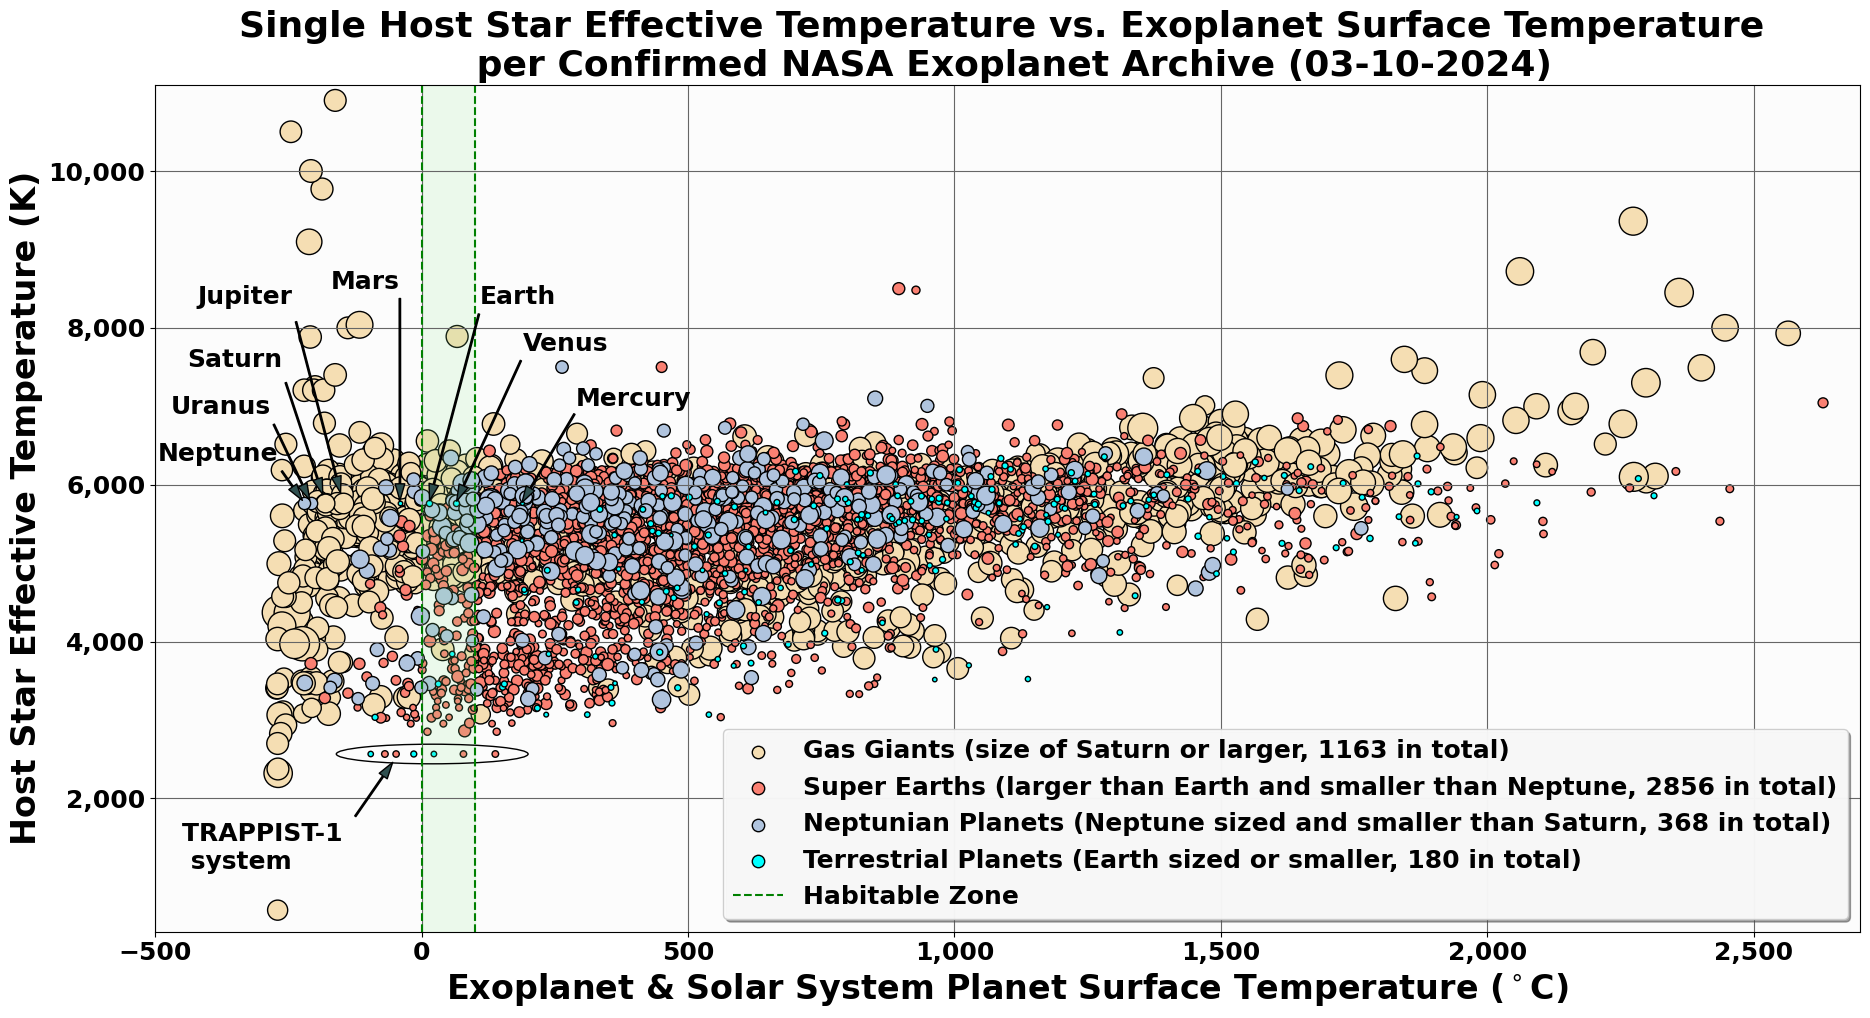

In [37]:
fig = plt.figure(figsize=(22,11))
ax = fig.add_subplot(111, facecolor='0.99')

ax.set_xlim(-500, 2700)
ax.set_ylim(300, 11100)
ax.grid(color='0.4')
ax.set_title('Single Host Star Effective Temperature vs. Exoplanet Surface Temperature \n per Confirmed NASA Exoplanet Archive (03-10-2024)', fontweight ='bold')
ax.title.set_fontsize(26)
ax.set_xlabel('Exoplanet & Solar System Planet Surface Temperature ($^\circ$C)', fontweight ='bold')
ax.xaxis.label.set_fontsize(24)
ax.set_ylabel('Host Star Effective Temperature (K)', fontweight ='bold')
ax.yaxis.label.set_fontsize(24)

plot_exoplanets_with_size(ax=ax,
                          exoplanets_data=st_teff_vs_pl_tsurf_plot_data_with_solar_system_planets,
                          x_field='pl_tsurf_c',
                          y_field='st_teff',
                          size_field='pl_rade',
                          type_field='pl_type',
                          hz_status_field='pl_hz_status',
                          scale_size=20,
                          edgecolors='black',
                          exoplanet_color_map=exoplanet_type_colors_with_solar_system_planets_and_counts,
                          exoplanet_label_map=exoplanet_type_labels_with_solar_system_planets_and_counts)

ax.annotate('Mercury', xy=(188.40, 5772), xytext=(290, 7000),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Venus', xy=(64.53, 5772), xytext=(190, 7700),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0.01))

ax.annotate('Earth', xy=(13.98, 5772), xytext=(110, 8300),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0.01))

ax.annotate('Mars', xy=(-40.57, 5772), xytext=(-170, 8500),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0.01))

ax.annotate('Jupiter', xy=(-147.29, 5772), xytext=(-420, 8300),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0.05))

ax.annotate('Saturn', xy=(-180.40, 5772), xytext=(-440, 7500),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0.06))

ax.annotate('Uranus', xy=(-207.61, 5772), xytext=(-470, 6900),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0.03))

ax.annotate('Neptune', xy=(-220.79, 5772), xytext=(-495, 6300),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0.06))

plt.vlines(x=0, ymin=300, ymax=11100, colors='green', linestyles='dashed', label='Habitable Zone')
plt.vlines(x=100, ymin=300, ymax=11100, colors='green', linestyles='dashed')

ax.add_patch(plt.Rectangle(xy=(0, 0),
                           width=100,
                           height=11100,
                           color='lightgreen',
                           alpha=0.15))

ell = Ellipse(xy=[20,2566], width=360, height=250, angle=0, edgecolor='black', lw=1, facecolor='none')
ax.add_artist(ell)
ax.annotate('TRAPPIST-1 \n system', xy=(-50, 2500), xytext=(-450, 1100),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0.05))

ax.set_yticklabels(ax.get_yticks(), weight='bold', size=18)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_xticklabels(ax.get_xticks(), rotation=0, weight='bold', size=18)
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

legend_properties = {'size':18, 'weight':'bold'}
legend = ax.legend(scatterpoints=1,
                   labelcolor='black',
                   loc='best',
                   markerscale=2,
                   shadow=True,
                   framealpha=0.95,
                   prop=legend_properties)
set_legend_size(legend, len(exoplanet_type_labels), 80)

frame = legend.get_frame()
frame.set_facecolor('0.99')

In [38]:
st_teff_vs_pl_tsurf_plot_data['pl_tsurf_k'].describe(percentiles=[.25, .5, .75, .90, .95, .99, .995, .999])

,pl_tsurf_k
count,4567.000000
mean,878.431386
std,485.088098
min,1.221287
25%,524.188214
50%,818.291605
75%,1155.655044
90%,1538.655746
95%,1778.860285
99%,2213.608691


<ipython-input-39-1adc6c81d069>:73: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), weight='bold', size=18)
<ipython-input-39-1adc6c81d069>:75: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), rotation=0, weight='bold', size=18)


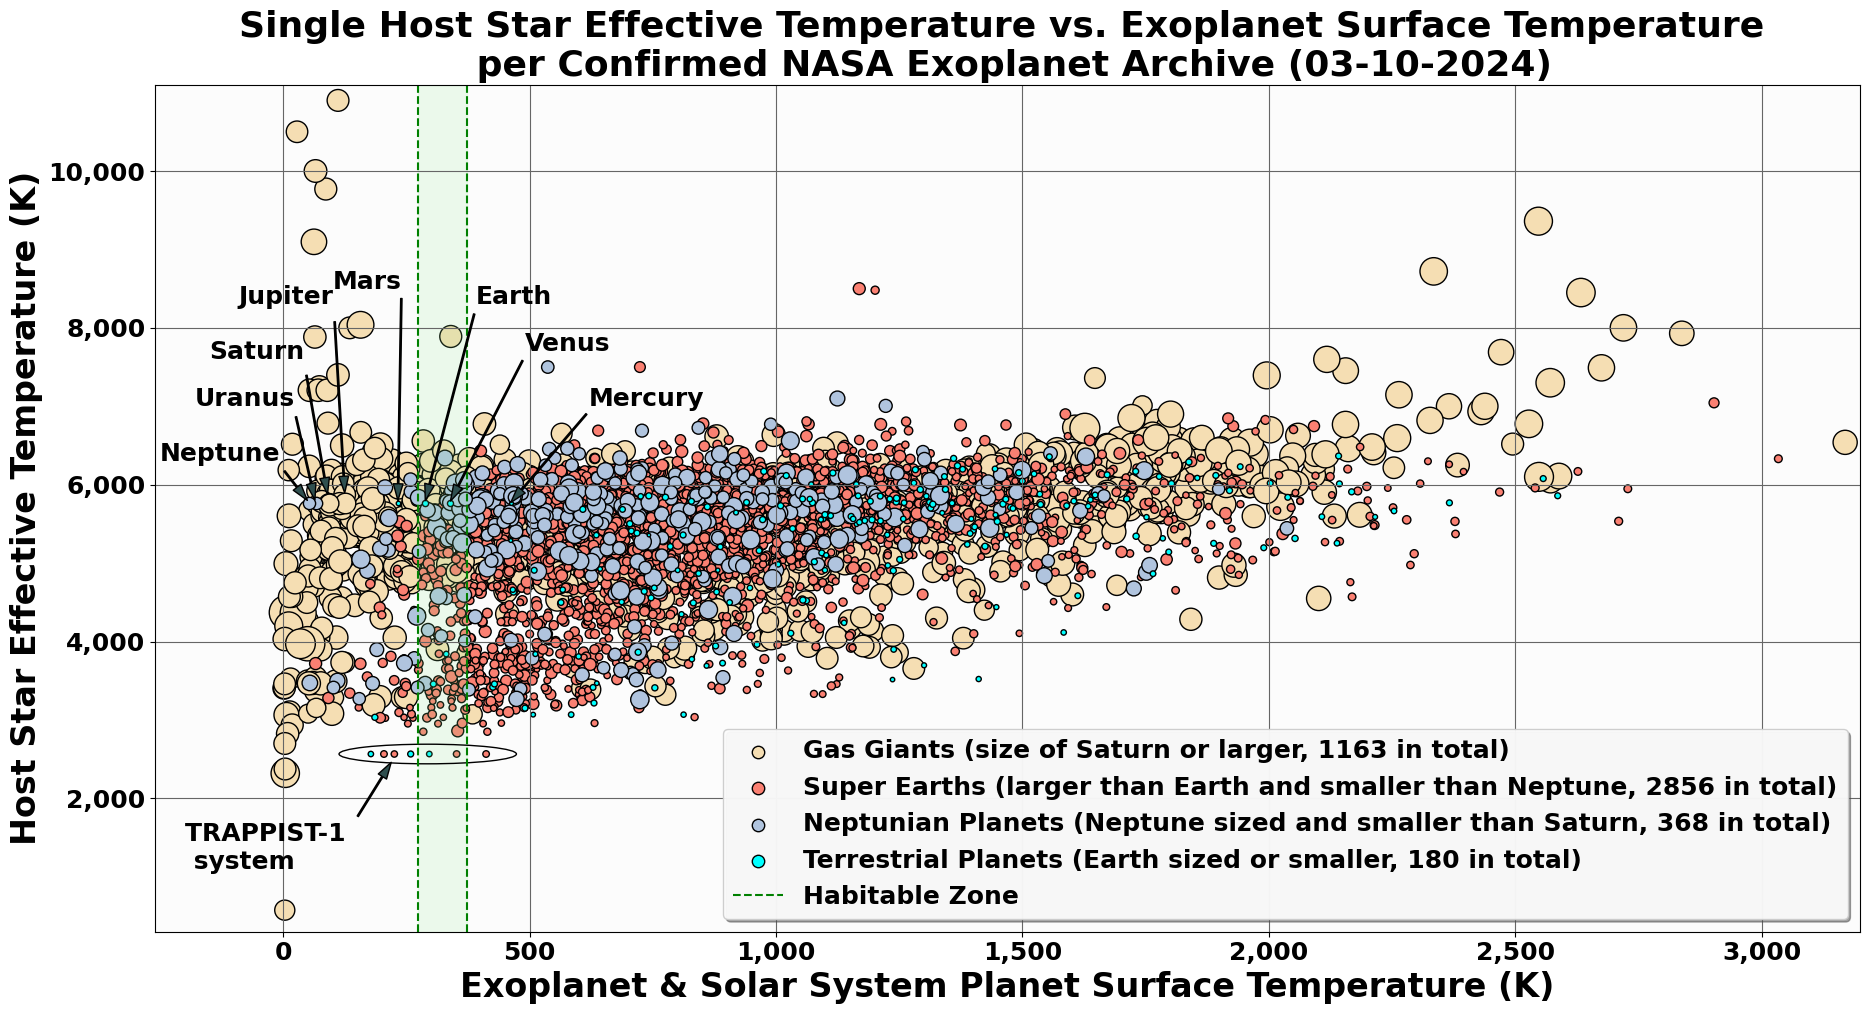

In [39]:
fig = plt.figure(figsize=(22,11))
ax = fig.add_subplot(111, facecolor='0.99')

ax.set_xlim(-260, 3200)
ax.set_ylim(300, 11100)
ax.grid(color='0.4')
ax.set_title('Single Host Star Effective Temperature vs. Exoplanet Surface Temperature \n per Confirmed NASA Exoplanet Archive (03-10-2024)', fontweight ='bold')
ax.title.set_fontsize(26)
ax.set_xlabel('Exoplanet & Solar System Planet Surface Temperature (K)', fontweight ='bold')
ax.xaxis.label.set_fontsize(24)
ax.set_ylabel('Host Star Effective Temperature (K)', fontweight ='bold')
ax.yaxis.label.set_fontsize(24)

plot_exoplanets_with_size(ax=ax,
                          exoplanets_data=st_teff_vs_pl_tsurf_plot_data_with_solar_system_planets,
                          x_field='pl_tsurf_k',
                          y_field='st_teff',
                          size_field='pl_rade',
                          type_field='pl_type',
                          hz_status_field='pl_hz_status',
                          scale_size=20,
                          edgecolors='black',
                          exoplanet_color_map=exoplanet_type_colors_with_solar_system_planets_and_counts,
                          exoplanet_label_map=exoplanet_type_labels_with_solar_system_planets_and_counts)

ax.annotate('Mercury', xy=(461.55, 5772), xytext=(620, 7000),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Venus', xy=(337.68, 5772), xytext=(490, 7700),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0.01))

ax.annotate('Earth', xy=(287.13, 5772), xytext=(390, 8300),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0.01))

ax.annotate('Mars', xy=(232.58, 5772), xytext=(100, 8500),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0.01))

ax.annotate('Jupiter', xy=(125.86, 5772), xytext=(-90, 8300),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0.05))

ax.annotate('Saturn', xy=(92.75, 5772), xytext=(-150, 7600),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0.06))

ax.annotate('Uranus', xy=(65.54, 5772), xytext=(-180, 7000),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0.03))

ax.annotate('Neptune', xy=(52.36, 5772), xytext=(-250, 6300),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0.06))

plt.vlines(x=273.15, ymin=300, ymax=11100, colors='green', linestyles='dashed', label='Habitable Zone')
plt.vlines(x=373.15, ymin=300, ymax=11100, colors='green', linestyles='dashed')

ax.add_patch(plt.Rectangle(xy=(273.15, 0),
                           width=100,
                           height=11100,
                           color='lightgreen',
                           alpha=0.15))

ell = Ellipse(xy=[293.15,2566], width=360, height=250, angle=0, edgecolor='black', lw=1, facecolor='none')
ax.add_artist(ell)
ax.annotate('TRAPPIST-1 \n system', xy=(223, 2500), xytext=(-200, 1100),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0.05))

ax.set_yticklabels(ax.get_yticks(), weight='bold', size=18)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_xticklabels(ax.get_xticks(), rotation=0, weight='bold', size=18)
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

legend_properties = {'size':18, 'weight':'bold'}
legend = ax.legend(scatterpoints=1,
                   labelcolor='black',
                   loc='best',
                   markerscale=2,
                   shadow=True,
                   framealpha=0.95,
                   prop=legend_properties)
set_legend_size(legend, len(exoplanet_type_labels), 80)

frame = legend.get_frame()
frame.set_facecolor('0.99')